# Logistic Regression

선형 회귀로 풀리지 않는 문제 -> 독립변수와 종속변수가 비선형 관계인 경우

공부시간과 합격률의 관계 -> 

연속적으로 변하는 공부시간의 결과에 대해 “합격했다” 또는 “합격하지 않았다?”의 결과만 필요

분류방법 1 -> 

선형분류


더 나은 분류 방법은?

- 1958년 D.R.Cox가 제안한 확률 모델로 독립변수의 선형 결합을 이용하여 종속변수 (사건의 발생 가능성)을 예측하는데 사용되는 통계 기법 

-> 종속 변수가 범주형 데이터를 대상 -> 분류

- 선형 회귀는 독립변수 x가 변화할 때 종속변수 y가 어떻게 변하는 지 예측하는 것

- 선형 회귀에서 x와 y의 범위 : \[-∞, ∞\]

- 연속적으로 변하는 2개의 결과만을 확인하는 경우 -> 조사회수가 많아지면 종속 변수 y는 확률로 표현됨 -> 독립변수의 범위는 \[-∞, ∞\], 종속변수의 범위는 \[0, 1\] -> 선형회귀를 적용하면 종속변수의 값 범위를 넘어가는 문제가 발생 -> 예측정확도 하락 -> <font  color=blue>로지스틱 모형</font> 적용

오즈 (odds) : 성공확률이 실패확률에 비해 몇 배 높은가를 나타냄, 범위 \[0, 1\]

$$
 odds=\frac { p(y) }{ 1-p(y) }  
$$

로짓 변환 : 오즈에 자연로그를 취한 것으로 입력 값의 범위가 \[0, 1\] 일 때 출력 값의 범위를 \[-∞, ∞\]
로 조정

$$
 \log _{ e } {\frac { p(y) }{ 1-p(y) }} =\ln { \frac { p(y) }{ 1-p(y) }  }  
 $$

로지스틱 함수 (sigmoid 함수) : 독립변수 x가 어느 숫자이든 상관없이 종속 변수의 값의 범위가 항
상 \[0, 1\] 범위에 있도록 함

$$ \ln { \frac { p(y) }{ 1-p(y) }  }  = z  $$ 

<br>

 $$  \frac { p(y) }{ 1-p(y) }   = { e }^{ z  }  $$ <br>

 $$
\begin{align}
p & = \frac {  { e }^{ z  }  }{ 1 +  { e }^{ z  }  } \\
& = \frac {  1  }{ 1 +  { e }^{(- z)  }  } 
\end{align}
 %%

## 로지스틱 회귀 (Logistic Regression)

- 간단하면서도 파라미터의 수가 적어서 빠르게 예측 -> 다른 알고리즘과의 비교 기준점으로 사용

- 로지스틱 함수를 사용하여 확률을 추정하며 2 클래스 및 다중 클래스 분류를 위한 강력한 통계 방법으로 빠르고 단순

- 직선 대신 S 모양 곡선을 사용한다는 사실 때문에 데이터를 그룹으로 나누는 데 적합

- 용도 : 신용 점수, 마케팅 캠페인의 성공률 측정, 특정 제품의 매출 예측률, 특정 날에 지진이 발생할 확률

- 선형 회귀 방식을 분류에 적용한 알고리즘 (선형 회귀 계열)

- Linear Regression와 매우 비슷하지만 가중치(w) 합을 사용하는 대신 예측한 값을 임계치 0 과 비교

- 계산한 값이 0보다 작은 클래스는 -1, 0보다 크면 +1이라고 예측(분류)

- 이 규칙은 Classifier에 쓰이는 모든 Linear model에서 동일

- 가장 널리 알려진 두 개의 linear classifier algorithm

  1. Logistic Regression
  
  1. Support Vector Classifier의 Linear SVC

[LogisticRegression()](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
```
LogisticRegression(penalty, dual, tol, C, fit_intercept, intercept_scaling, class_weight, random_state, solver, max_iter, multi_class, verbose, warm_start, n_jobs, l1_ratio)
```
- <font  color=blue> penalty : 규제에 사용 된 기준을 지정 (l1, l2, elasticnet, none) – default : l2 </font>
- dual : 이중 또는 초기 공식
- tol : 정밀도
- <font  color=blue> C : 규제 강도 </font>
- fit_intercept : 모형에 상수항 (절편)이 있는가 없는가를 결정하는 인수 (default : True)
- intercept_scaling : 정규화 효과 정도
- class_weight : 클래스의 가중치
- random_state : 난수 seed 설정
- solver : 최적화 문제에 사용하는 알고리즘
- max_iter : 계산에 사용할 작업 수
- multi_class : 다중 분류 시에 (ovr, multinomial, auto)로 설정
- verbose : 동작 과정에 대한 출력 메시지
- warm_start : 이전 모델을 초기화로 적합하게 사용할 것인지 여부
- n_jobs : 병렬 처리 할 때 사용되는 CPU 코어 수
- <font  color=blue> l1_ratio : L1 규제의 비율(Elastic-Net 믹싱 파라미터 경우에만 사용) </font>

# Logistic Regression 실습 01

학습 시간 대비 합격 분류 적용

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [18]:
pass_time = [8,9, 9, 9.5, 10, 12, 14, 14.5, 15, 16, 16, 16.5, 17, 17, 17, 17.5,20, 20, 20]

fail_time = [1, 2, 2.1,2.6,2.7,2.8,2.9, 3,3.2,3.4,3.5,3.6,3, 5,5.2,5.4]


In [19]:
X = np.hstack((pass_time, fail_time))
X

array([ 8. ,  9. ,  9. ,  9.5, 10. , 12. , 14. , 14.5, 15. , 16. , 16. ,
       16.5, 17. , 17. , 17. , 17.5, 20. , 20. , 20. ,  1. ,  2. ,  2.1,
        2.6,  2.7,  2.8,  2.9,  3. ,  3.2,  3.4,  3.5,  3.6,  3. ,  5. ,
        5.2,  5.4])

In [20]:
# y
y1 = [1] * len(pass_time)
y0 = [0] * len(fail_time)

y = np.hstack((y1, y0))
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [21]:
X.shape, y.shape

((35,), (35,))

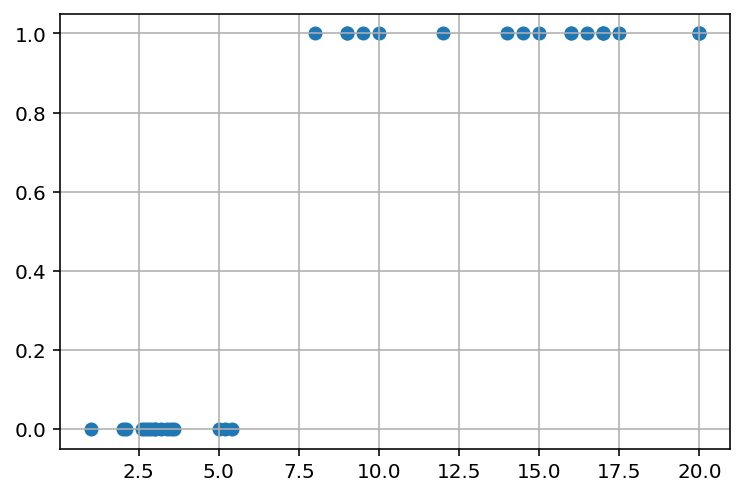

In [22]:
# 시각화
plt.scatter(X, y)
plt.grid()

In [23]:
model = LogisticRegression()

model.fit(X.reshape(-1, 1), y)

model.coef_, model.intercept_

(array([[1.32952239]]), array([-9.1854821]))

In [24]:
# 예측 분류
model.predict([[6.9]])

array([0])

In [25]:
# 예측 확률
model.predict_proba([[6.9]])

array([[0.50294437, 0.49705563]])

In [26]:
def logreg(z):
    return 1 / (1 + np.exp(-z))

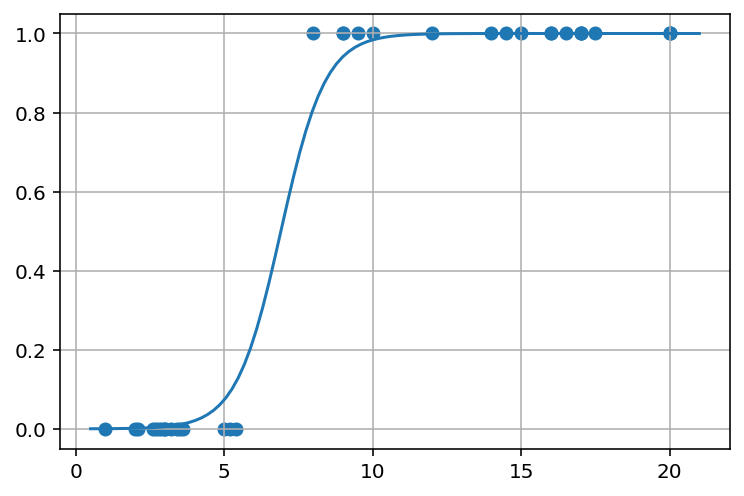

In [27]:
# 결과 시각화
plt.scatter(X, y)

xx = np.linspace(0.5, 21, 100)
yy = logreg(model.coef_ * xx + model.intercept_)

plt.plot(xx, yy[0])
plt.grid()

- yy가 2차원 이므로 yy\[0\] 을 이용해서 1차원으로 사용해야함

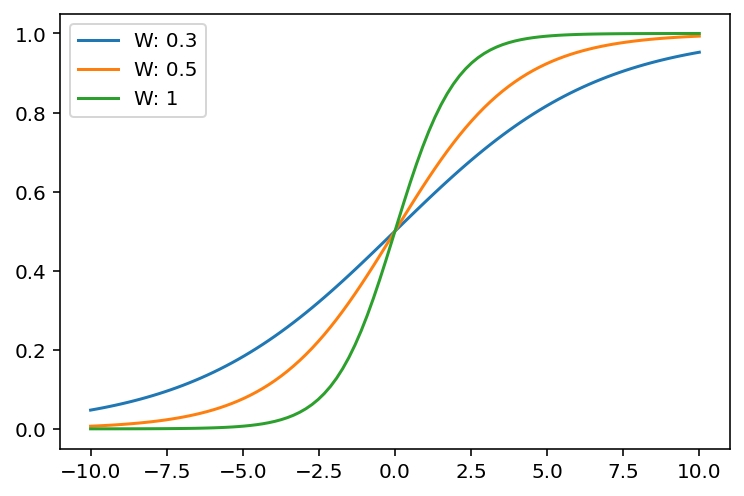

In [28]:
# 가중치값이 변경될때 그래프의 변화
# W(a)값이 작을때 -> 클 때
def logreg(z):
    return 1 / (1 + np.exp(-z))

W_list = [0.3, 0.5, 1]
b_list = [0]

xx = np.linspace(-10, 10, 100)
for W in W_list:
    for b in b_list:
        yy = logreg(W * xx + b)
        plt.plot(xx, yy, label=f"W: {W}")
        plt.legend()

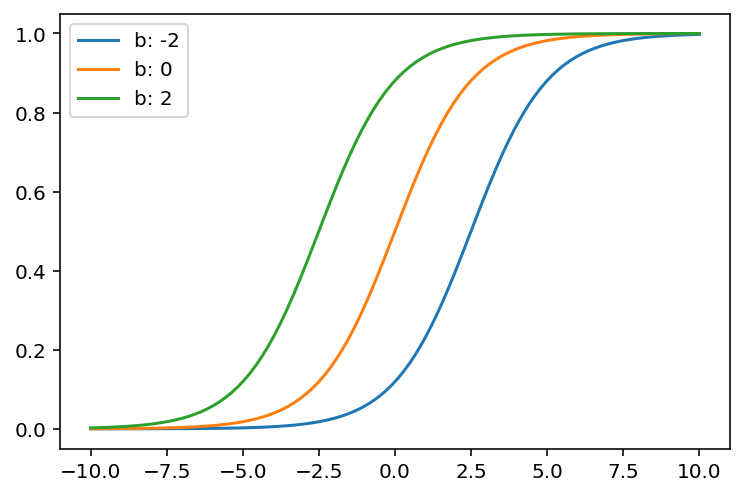

In [29]:
# 절편 이동
# b 값이 작을때 -> 클 때
def logreg(z):
    return 1 / (1 + np.exp(-z))

W_list = [0.8]
b_list = [-2, 0, 2]

xx = np.linspace(-10, 10, 100)
for W in W_list:
    for b in b_list:
        yy = logreg(W * xx + b)
        plt.plot(xx, yy, label=f"b: {b}")
        plt.legend()